In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/jupyter/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
dataset=pd.read_csv("USA_Cars.csv") 

In [5]:
dataset.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [6]:
dataset.shape

(2499, 13)

In [8]:
dataset.duplicated().sum()

0

In [11]:
dataset=dataset.drop(["Unnamed: 0","vin","lot","condition"],axis=1)

In [12]:
dataset.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   state         2499 non-null   object 
 8   country       2499 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 175.8+ KB


In [14]:
col1=["brand","model","title_status","color","state","country"]
for col in col1:
    dataset[col]=dataset[col].str.strip()

In [15]:
count=dataset["brand"].value_counts()
count

brand
ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
buick                13
kia                  13
infiniti             12
honda                12
mercedes-benz        10
cadillac             10
heartland             5
audi                  4
land                  4
peterbilt             4
acura                 3
mazda                 2
lexus                 2
lincoln               2
toyota                1
harley-davidson       1
jaguar                1
maserati              1
ram                   1
Name: count, dtype: int64

In [16]:
threshold=9
rep=count[count<=threshold].index
dataset["brand"]=dataset["brand"].replace(rep,"uncommon")

In [18]:
dataset["brand"].value_counts()

brand
ford             1235
dodge             432
nissan            312
chevrolet         297
gmc                42
uncommon           31
jeep               30
chrysler           18
bmw                17
hyundai            15
buick              13
kia                13
honda              12
infiniti           12
mercedes-benz      10
cadillac           10
Name: count, dtype: int64

In [19]:
count1=dataset["model"].value_counts()

In [20]:
threshold=10
rep=count1[count1<=threshold].index
dataset["model"]=dataset["model"].replace(rep,"other_models")

In [21]:
dataset["model"].value_counts()

model
door            651
other_models    255
f-150           219
doors           148
caravan         102
mpv              87
fusion           65
durango          64
journey          61
rogue            54
van              46
challenger       44
charger          42
transit          41
max              41
sport            40
1500             39
escape           39
explorer         39
srw              38
versa            34
edge             34
flex             33
wagon            30
mustang          29
sentra           28
expedition       28
pathfinder       22
altima           21
equinox          18
suburban         16
pickup           15
frontier         14
fiesta           14
malibu           12
colorado         12
cutaway          12
impala           12
Name: count, dtype: int64

In [22]:
dataset["model"].nunique()

38

In [23]:
dataset["title_status"].value_counts()

title_status
clean vehicle        2336
salvage insurance     163
Name: count, dtype: int64

In [25]:
count2=dataset["color"].value_counts()
count2

color
white                                      707
black                                      516
gray                                       395
silver                                     300
red                                        192
blue                                       151
no_color                                    61
green                                       24
orange                                      20
gold                                        19
charcoal                                    18
brown                                       15
yellow                                       9
magnetic metallic                            6
shadow black                                 5
color:                                       5
beige                                        5
ingot silver metallic                        4
oxford white                                 4
billet silver metallic clearcoat             3
triple yellow tri-coat                       3
super b

In [28]:
threshold=14
rep2=count2[count2<=threshold].index
dataset["color"]=dataset["color"].replace(rep2,"other_colors")

In [29]:
dataset["color"].value_counts()

color
white           707
black           516
gray            395
silver          300
red             192
blue            151
other_colors     81
no_color         61
green            24
orange           20
gold             19
charcoal         18
brown            15
Name: count, dtype: int64

In [31]:
count3=dataset["state"].value_counts()

In [32]:
dataset["state"].nunique()

44

In [33]:
threshold=50
rep3=count3[count3<=threshold].index
dataset["state"]=dataset["state"].replace(rep3,"other_states")

In [34]:
dataset["state"].value_counts()

state
other_states      403
pennsylvania      299
florida           246
texas             214
california        190
michigan          169
north carolina    146
minnesota         119
illinois          113
wisconsin          94
virginia           90
new jersey         87
nevada             85
oklahoma           71
south carolina     64
new york           58
georgia            51
Name: count, dtype: int64

In [35]:
dataset["country"].value_counts()

country
usa       2492
canada       7
Name: count, dtype: int64

In [36]:
col=["brand","model","year","title_status","mileage","color","state","country"]
x_train=dataset[col]
Y_train=dataset["price"]

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,Y_train,test_size=0.3)

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

ct=ColumnTransformer([("tnf1",OrdinalEncoder(categories=[["clean vehicle","salvage insurance"]]),["title_status"]),
                     ("tnf2",OneHotEncoder(sparse_output=False,drop="first"),["brand","model","color","state","country",])],remainder="passthrough")

In [39]:
x_train_column_transform=ct.fit_transform(x_train)
x_test_column_transform=ct.transform(x_test)

In [40]:
x_train_column_transform.shape

(1749, 84)

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [42]:
lr=LinearRegression()
sv=SVR()
dt=DecisionTreeRegressor()

In [43]:
lr.fit(x_train_column_transform,y_train)
sv.fit(x_train_column_transform,y_train)
dt.fit(x_train_column_transform,y_train)

DecisionTreeRegressor()

In [44]:
lr_pred=lr.predict(x_test_column_transform)
sv_pred=sv.predict(x_test_column_transform)
dt_pred=dt.predict(x_test_column_transform)

In [45]:
from sklearn.metrics import mean_squared_error
print("mean_squared_error of LR:", mean_squared_error(y_test,lr_pred))
print("mean_squared_error of SVM:", mean_squared_error(y_test,sv_pred))
print("mean_squared_error of Decission Tree:", mean_squared_error(y_test,dt_pred))

mean_squared_error of LR: 54258268.27096521
mean_squared_error of SVM: 137661516.1647802
mean_squared_error of Decission Tree: 90425432.89733334


In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in dataset.select_dtypes(include='object').columns:
    if col != 'title_status':
        le = LabelEncoder()
        dataset[col] = le.fit_transform(dataset[col])
        label_encoders[col] = le

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dataset = pd.read_csv('USA_Cars.csv')

label_encoders = {}
for col in dataset.select_dtypes(include='object').columns:
    if col != 'title_status':
        le = LabelEncoder()
        dataset[col] = le.fit_transform(dataset[col])
        label_encoders[col] = le

target_encoder = LabelEncoder()
dataset['title_status'] = target_encoder.fit_transform(dataset['title_status'])

x = dataset.drop('title_status', axis=1)
y = dataset['title_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=target_encoder.classes_))


Accuracy: 0.986

 Confusion Matrix:
 [[464   1]
 [  6  29]]

 Classification Report:
                    precision    recall  f1-score   support

    clean vehicle       0.99      1.00      0.99       465
salvage insurance       0.97      0.83      0.89        35

         accuracy                           0.99       500
        macro avg       0.98      0.91      0.94       500
     weighted avg       0.99      0.99      0.99       500



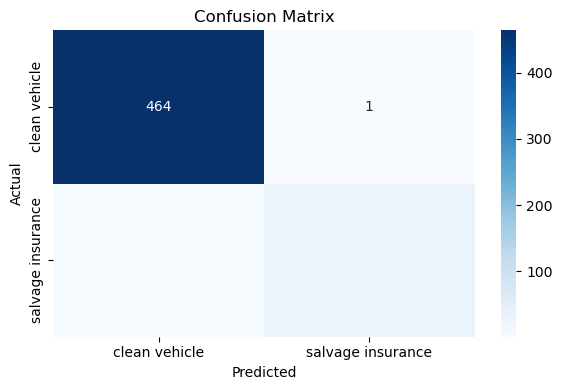

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
labels = target_encoder.classes_
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


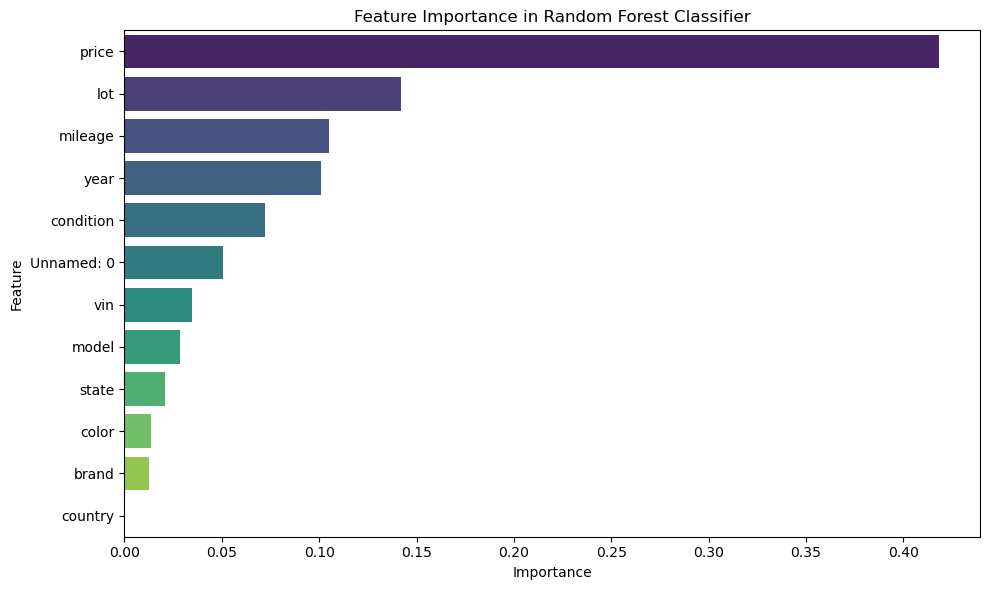

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feature_names = x.columns

feat_dataset = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_dataset, palette='viridis')
plt.title('Feature Importance in Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


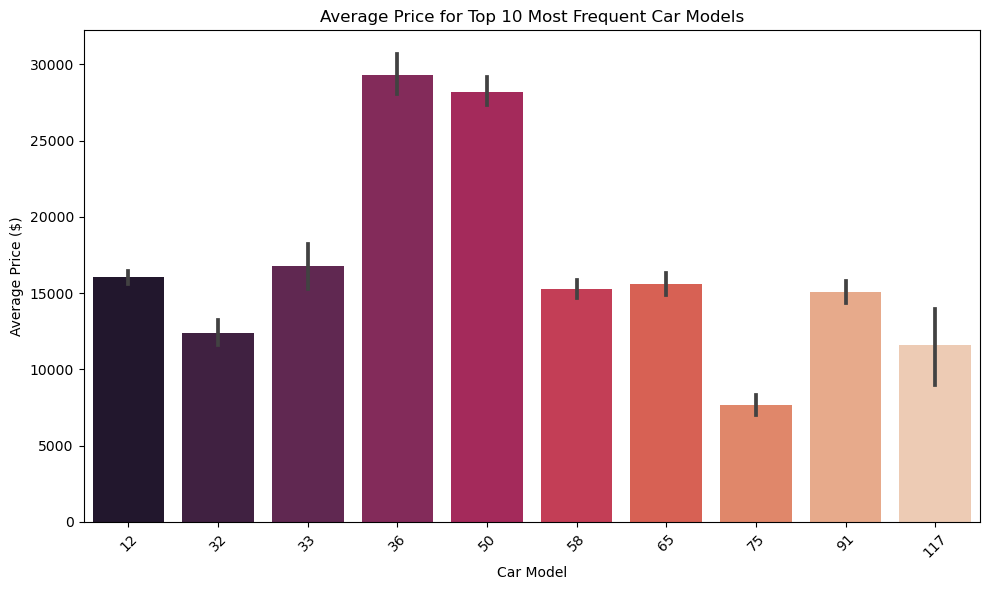

In [61]:
top_models = dataset['model'].value_counts().head(10).index
filtered_dataset = dataset[dataset['model'].isin(top_models)]

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_dataset, x='model', y='price', estimator='mean', palette='rocket')

plt.title('Average Price for Top 10 Most Frequent Car Models')
plt.xlabel('Car Model')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_922/921961783.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dataset.groupby('mileage_bin')['price'].mean().reset_index()
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


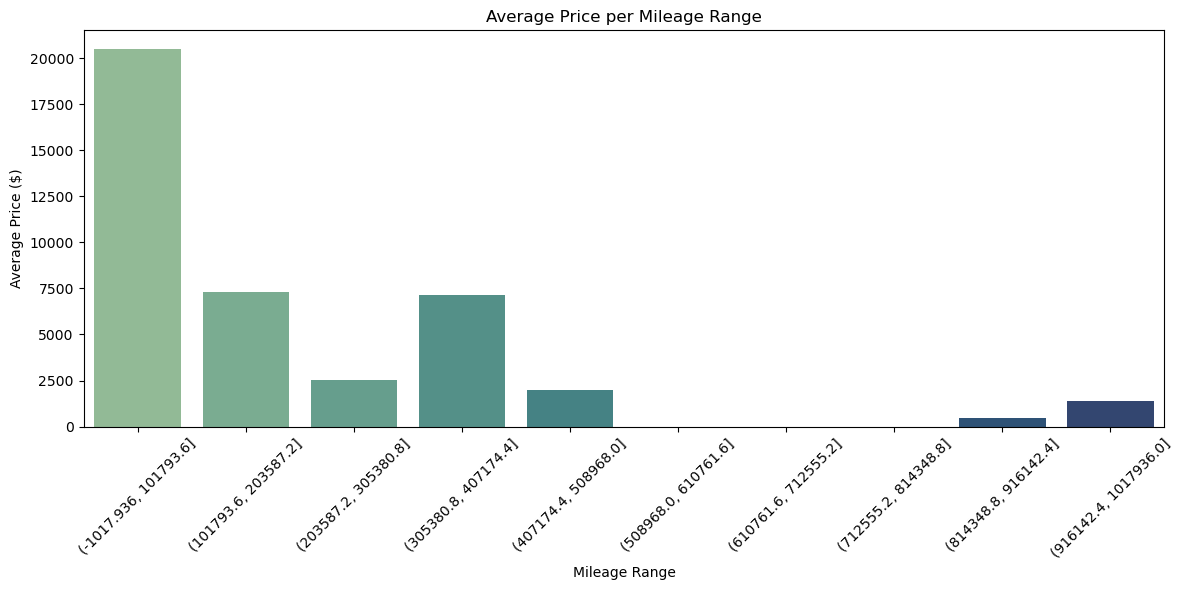

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset['mileage_bin'] = pd.cut(dataset['mileage'], bins=10)

grouped = dataset.groupby('mileage_bin')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='mileage_bin', y='price', palette='crest')

plt.title('Average Price per Mileage Range')
plt.xlabel('Mileage Range')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

dataset = pd.read_csv("USA_Cars.csv")

dataset = dataset.drop(columns=["Unnamed: 0", "vin", "lot", "country"])

label_encoders = {}
for col in dataset.select_dtypes(include="object").columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

x = dataset.drop(columns=["price"])
y = dataset["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x.columns)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred = lr.predict(x_test_scaled)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 7780.950477956126
R²: 0.2969808624192337


In [19]:
x_train_scaled = np.nan_to_num(x_train_scaled)
x_test_scaled = np.nan_to_num(x_test_scaled)

In [20]:
print("size of x_train_scaled:", x_train_scaled.shape)
print("size of x_test_scaled:", x_test_scaled.shape)

size of X_train_scaled: (1999, 8)
size of X_test_scaled: (500, 8)


In [21]:
print(y_train.value_counts())

price
0        34
16500    21
15000    18
25       18
25000    16
         ..
18497     1
9210      1
4450      1
1400      1
4650      1
Name: count, Length: 693, dtype: int64


In [23]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.0380
Decision Tree Accuracy: 0.0640
SVM Accuracy: 0.0440
Random Forest Accuracy: 0.0800
KNN Accuracy: 0.0540



Best Model: Random Forest
              precision    recall  f1-score   support

           0       0.47      0.78      0.58         9
          25       0.00      0.00      0.00         0
          50       1.00      1.00      1.00         1
          75       0.00      0.00      0.00         1
         175       0.00      0.00      0.00         1
         200       0.00      0.00      0.00         1
         375       0.00      0.00      0.00         1
         450       0.00      0.00      0.00         1
         650       0.00      0.00      0.00         0
         800       0.00      0.00      0.00         0
         900       0.00      0.00      0.00         0
        1000       0.00      0.00      0.00         1
        1025       0.00      0.00      0.00         1
        1200       0.00      0.00      0.00         1
        1280       0.00      0.00      0.00         1
        1300       0.00      0.00      0.00         0
        1350       0.00      0.00      0.00         0


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

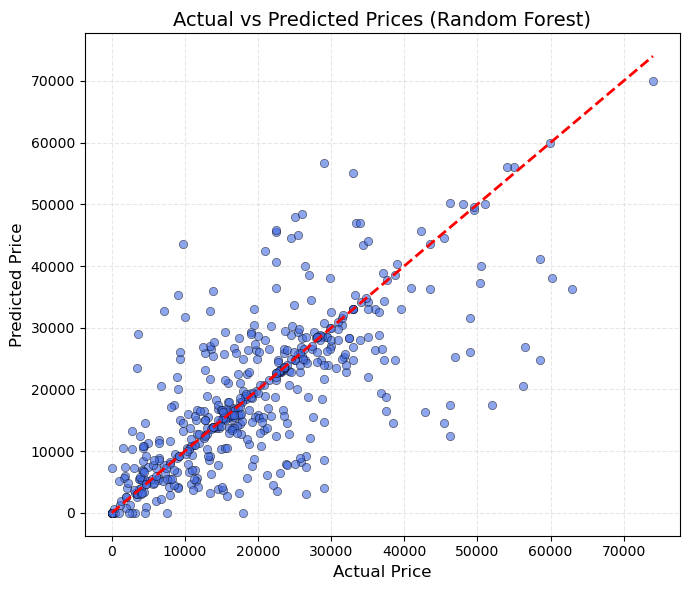

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


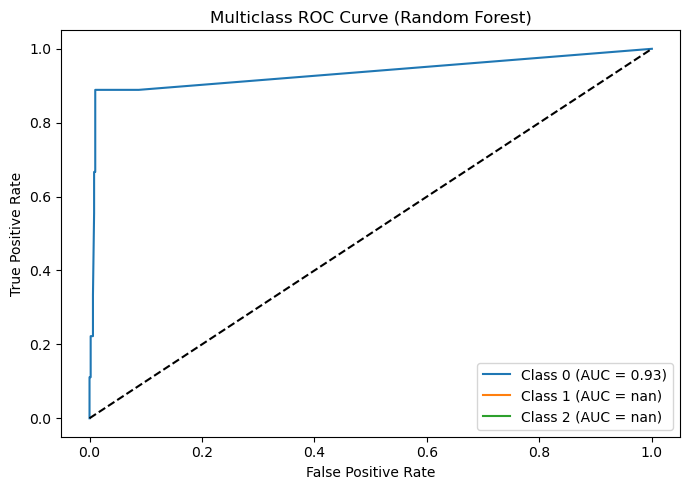

In [34]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    results[name] = model.score(x_test_scaled, y_test)

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_pred = best_model.predict(x_test_scaled)
y_proba = best_model.predict_proba(x_test_scaled)

print("\nBest Model:", best_model_name)
print(classification_report(y_test, y_pred))


# Confusion matrix

# طباعة مقاييس الأداء
print(f"\n✅ Best Model: {best_model_name}")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# ✅ Scatter Plot: Actual vs. Predicted Prices
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='royalblue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"Actual vs Predicted Prices ({best_model_name})", fontsize=14)
plt.xlabel("Actual Price", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
fpr, tpr, roc_auc = {}, {}, {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7,5))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Multiclass ROC Curve ({best_model_name})")
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Load and preprocess data
dataset = pd.read_csv("USA_Cars.csv")
dataset = dataset.drop(columns=["Unnamed: 0", "vin", "lot", "country"])

# Encode categorical features
for col in dataset.select_dtypes(include='object').columns:
    dataset[col] = LabelEncoder().fit_transform(dataset[col])

# Features and target
x = dataset.drop(columns=["price"])
y = dataset["price"]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 2. Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 3. Setup GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='r2', n_jobs=-1, verbose=1)

# 4. Fit the model
grid_search.fit(x_train_scaled, y_train)

# 5. Results
best_rf = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)
print("🏆 Best Cross-Validated R² Score:", grid_search.best_score_)
# 6. Evaluation on test set
y_pred = best_rf.predict(x_test_scaled)
print("\n📊 Performance of Tuned Random Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
🏆 Best Cross-Validated R² Score: 0.6194780492869159

📊 Performance of Tuned Random Forest:
MAE: 4556.89337
RMSE: 6954.512725911367
R² Score: 0.6948430606086335


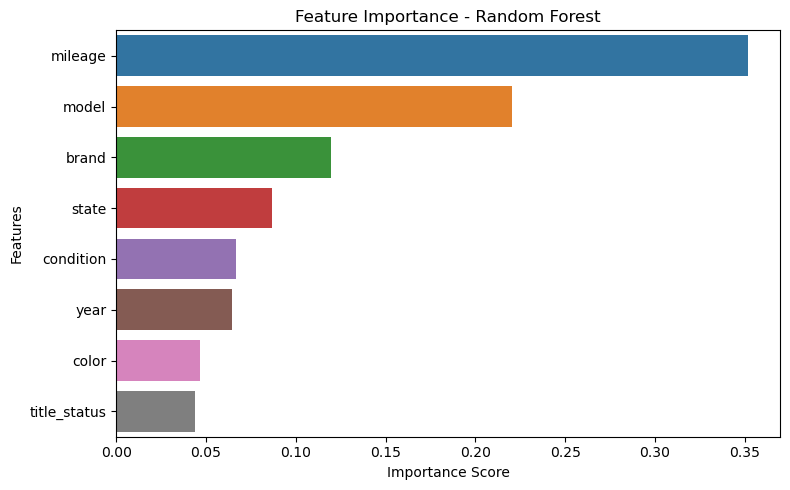

ModuleNotFoundError: No module named 'shap'

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
importances = best_rf.feature_importances_
feature_names = x.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

import shap 

# Create explainer using scaled data (because model was trained on it)
explainer = shap.Explainer(best_rf, x_train_scaled)

# Wrap test data in DataFrame to retain feature names
x_test_scaled_dataset = pd.DataFrame(x_test_scaled, columns=x.columns)

# Compute SHAP values (disable strict check)
shap_values = explainer(x_test_scaled_dataset, check_additivity=False)

# Global Explanation - Summary Bar Plot
shap.summary_plot(shap_values, x_test_scaled_dataset, plot_type="bar")